# PCOS without  infertility detection

## 1- data cleaning 

In [2]:
import pandas as pd

In [3]:
data=pd.read_excel('data/PCOS_data_without_infertility.xlsx ',sheet_name='Full_new')

In [4]:
data

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.000,19.300000,15,78,22,10.48,2,5,7.0,0,0,1.99,1.99,7.95,3.68,2.160326,36,30,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,11.70,2,5,11.0,1,0,60.80,1.99,6.73,1.09,6.174312,38,32,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,11.80,2,5,10.0,1,0,494.08,494.08,5.54,0.88,6.295455,40,36,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,12.00,2,5,4.0,0,0,1.99,1.99,8.06,2.36,3.415254,42,36,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,10.00,2,5,1.0,1,0,801.45,801.45,3.98,0.90,4.422222,37,30,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.500000,17,72,16,11.00,2,5,8.0,0,1,1.99,1.99,10.06,1.81,5.558011,28,26,0.928571,1.11,1.7,5.30,36.6,0.25,92.0,0,0,0,0,0,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.300000,15,72,18,10.80,2,5,4.0,1,1,80.13,1.99,5.07,2.84,1.785211,34,32,0.941176,2.05,5.6,21.09,23.0,0.25,108.0,1,0,0,0,0,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.400000,13,74,20,10.80,2,6,8.0,0,0,1.99,1.99,11.96,2.78,4.302158,30,28,0.933333,2.87,3.7,96.41,22.5,0.25,92.0,0,0,0,0,0,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.200000,15,74,20,12.00,4,2,2.0,0,0,292.92,1.99,4.40,4.33,1.016166,28,26,0.928571,2.50,5.2,38.89,22.4,0.25,115.0,0,0,0,0,1,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [6]:
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,5,7.0,0,0,1.99,1.99,7.95,3.68,2.160326,36,30,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,5,11.0,1,0,60.80,1.99,6.73,1.09,6.174312,38,32,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,5,10.0,1,0,494.08,494.08,5.54,0.88,6.295455,40,36,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,5,4.0,0,0,1.99,1.99,8.06,2.36,3.415254,42,36,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,5,1.0,1,0,801.45,801.45,3.98,0.90,4.422222,37,30,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [7]:
data.isnull().any()

Sl. No                    False
Patient File No.          False
PCOS (Y/N)                False
 Age (yrs)                False
Weight (Kg)               False
Height(Cm)                False
BMI                       False
Blood Group               False
Pulse rate(bpm)           False
RR (breaths/min)          False
Hb(g/dl)                  False
Cycle(R/I)                False
Cycle length(days)        False
Marraige Status (Yrs)      True
Pregnant(Y/N)             False
No. of aborptions         False
  I   beta-HCG(mIU/mL)    False
II    beta-HCG(mIU/mL)    False
FSH(mIU/mL)               False
LH(mIU/mL)                False
FSH/LH                    False
Hip(inch)                 False
Waist(inch)               False
Waist:Hip Ratio           False
TSH (mIU/L)               False
AMH(ng/mL)                False
PRL(ng/mL)                False
Vit D3 (ng/mL)            False
PRG(ng/mL)                False
RBS(mg/dl)                False
Weight gain(Y/N)          False
hair gro

In [8]:
data.columns = data.columns.str.strip()

#### Dealing with missing values

In [9]:
data['Unnamed: 44']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
536    NaN
537    NaN
538    NaN
539    NaN
540    NaN
Name: Unnamed: 44, Length: 541, dtype: object

In [10]:
data.drop('Unnamed: 44',axis=1,inplace=True)

In [11]:
data = data.drop_duplicates()

In [12]:
data.isnull().any()

Sl. No                    False
Patient File No.          False
PCOS (Y/N)                False
Age (yrs)                 False
Weight (Kg)               False
Height(Cm)                False
BMI                       False
Blood Group               False
Pulse rate(bpm)           False
RR (breaths/min)          False
Hb(g/dl)                  False
Cycle(R/I)                False
Cycle length(days)        False
Marraige Status (Yrs)      True
Pregnant(Y/N)             False
No. of aborptions         False
I   beta-HCG(mIU/mL)      False
II    beta-HCG(mIU/mL)    False
FSH(mIU/mL)               False
LH(mIU/mL)                False
FSH/LH                    False
Hip(inch)                 False
Waist(inch)               False
Waist:Hip Ratio           False
TSH (mIU/L)               False
AMH(ng/mL)                False
PRL(ng/mL)                False
Vit D3 (ng/mL)            False
PRG(ng/mL)                False
RBS(mg/dl)                False
Weight gain(Y/N)          False
hair gro

In [13]:
data['Marraige Status (Yrs)']

0       7.0
1      11.0
2      10.0
3       4.0
4       1.0
       ... 
536     8.0
537     4.0
538     8.0
539     2.0
540     2.0
Name: Marraige Status (Yrs), Length: 541, dtype: float64

In [14]:
data['Marraige Status (Yrs)']=data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].mean())

In [15]:
data['Marraige Status (Yrs)'].unique()

array([ 7.        , 11.        , 10.        ,  4.        ,  1.        ,
        8.        ,  2.        , 13.        ,  3.        , 15.        ,
        9.        , 20.        ,  6.        , 12.        ,  5.        ,
        3.5       , 17.        ,  2.5       ,  1.5       , 16.        ,
       18.        ,  0.        , 22.        , 19.        , 14.        ,
        4.5       , 30.        ,  6.5       ,  8.5       , 25.        ,
        7.5       , 24.        , 23.        ,  2.2       ,  7.68092593])

#### categorical colums

In [16]:
categ = data.select_dtypes(include=['object','bool']).columns.tolist()
categ

['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)']

In [17]:
# Encode categorical columns before scaling and modeling

from sklearn.preprocessing import LabelEncoder

for col in categ:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))


In [18]:
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

In [19]:
data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.00000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,2.560074,4.94085,7.680926,0.380776,0.288355,664.549235,44.188540,14.601832,6.469919,6.904831,37.992606,33.841035,0.891895,2.981281,150.902033,24.321497,49.915874,0.610945,99.835860,0.377079,0.273567,0.306839,0.452865,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,0.901950,1.49202,4.799385,0.486027,0.692575,3348.920576,59.749396,217.022081,86.673255,60.691822,3.967920,3.596894,0.046326,3.755532,86.335862,14.970391,346.206599,3.808853,18.559298,0.485104,0.446202,0.461609,0.498234,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,0.00000,0.000000,0.000000,0.000000,1.300000,0.000000,0.210000,0.020000,0.002146,26.000000,24.000000,0.755556,0.040000,0.000000,0.400000,0.000000,0.047000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,2.000000,4.00000,4.000000,0.000000,0.000000,1.990000,4.000000,3.300000,1.020000,1.416244,36.000000,32.000000,0.857143,1.480000,70.000000,14.520000,20.800000,0.250000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,5.00000,7.000000,0.000000,0.000000,20.000000,4.000000,4.850000,2.300000,2.169231,38.000000,34.000000,0.894737,2.260000,153.000000,21.920000,25.900000,0.320000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,4.000000,5.00000,10.000000,1.000000,0.000000,297.210000,76.000000,6.410000,3.680000,3.959184,40.000000,36.000000,0.928571,3.570000,223.000000,29.890000,34.500000,0.450000,107.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,12.00000,30.000000,1.000000,5.000000,32460.970000,202.000000,5052.000000,2018.000000,1372.826087,48.000000,47.000000,0.979167,65.000000,300.000000,128.240000,6014.660000,85.000000,350.000000,1.000000,1.000000,

In [20]:
data['Blood Group']

0      15
1      15
2      11
3      13
4      11
       ..
536    17
537    15
538    13
539    15
540    13
Name: Blood Group, Length: 541, dtype: int64

In [21]:
data.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [22]:
data.drop(['Sl. No', 'Patient File No.'],axis=1,inplace=True)


In [23]:
data.shape

(541, 42)

## 2- Data vizualisation

In [24]:
#How the features correlate with PCOS (Y/N)
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = data.corr()
corrmat["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.377933
Pimples(Y/N)              0.286077
Weight (Kg)               0.211938
BMI                       0.199534
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
AMH(ng/mL)                0.065741
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)          0.036928
Blood Group               0.036433
II    beta-HCG(mIU/m

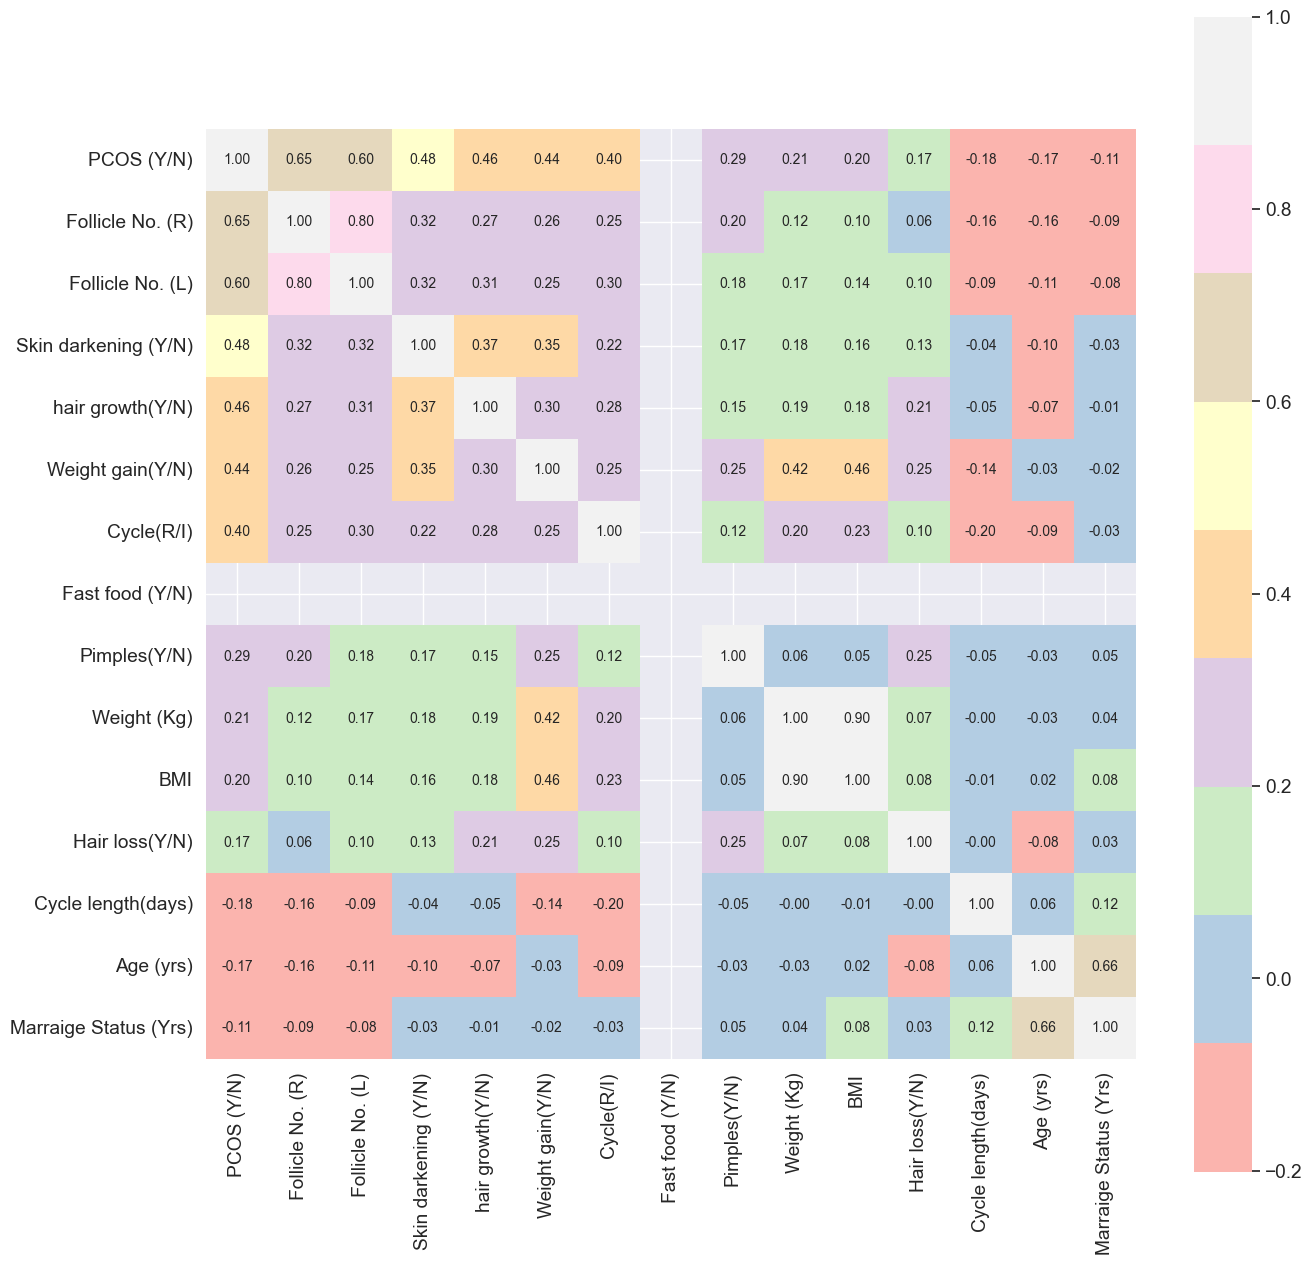

In [25]:
import numpy as np
plt.figure(figsize=(15,15))
k = 12 
l = 3 
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

C:\Users\lando\AppData\Local\Temp\ipykernel_18524\241476317.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="PCOS (Y/N)", data=data, palette="Set2")


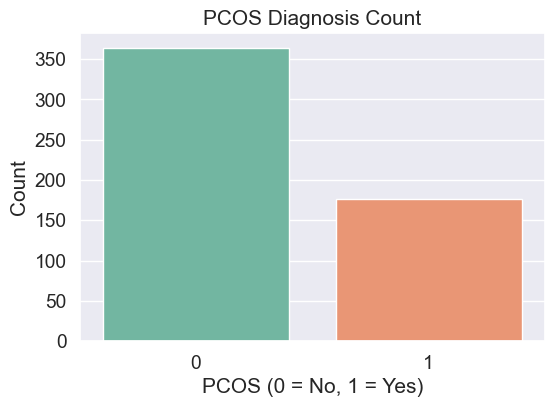

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x="PCOS (Y/N)", data=data, palette="Set2")
plt.title("PCOS Diagnosis Count")
plt.xlabel("PCOS (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()



In [27]:
data['PCOS (Y/N)'].value_counts()

PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64

In [28]:
data['Blood Group'].unique

<bound method Series.unique of 0      15
1      15
2      11
3      13
4      11
       ..
536    17
537    15
538    13
539    15
540    13
Name: Blood Group, Length: 541, dtype: int64>

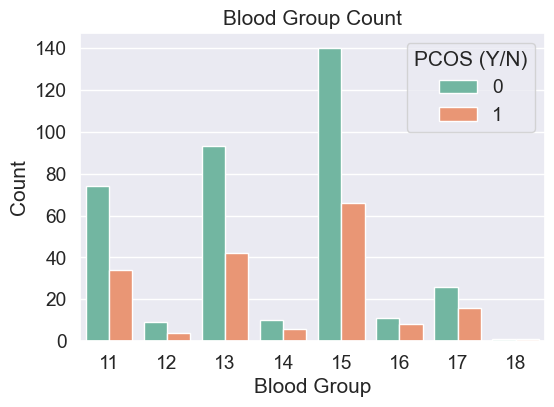

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x="Blood Group",data=data, hue='PCOS (Y/N)', palette="Set2")
plt.title("Blood Group Count")
plt.xlabel("Blood Group")
plt.ylabel("Count")
plt.show()

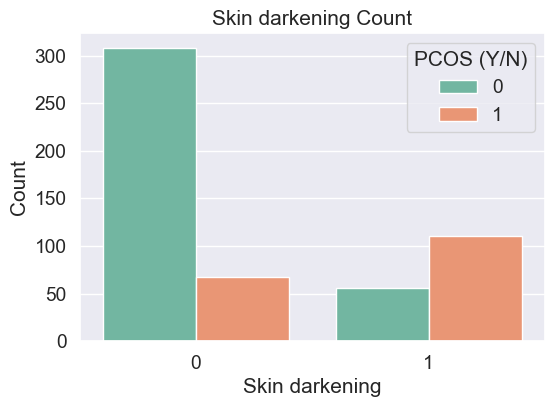

In [30]:
data['Skin darkening (Y/N)'].unique()
plt.figure(figsize=(6,4))
sns.countplot(x="Skin darkening (Y/N)",data=data, hue='PCOS (Y/N)', palette="Set2")
plt.title("Skin darkening Count")
plt.xlabel("Skin darkening")
plt.ylabel("Count")
plt.show()

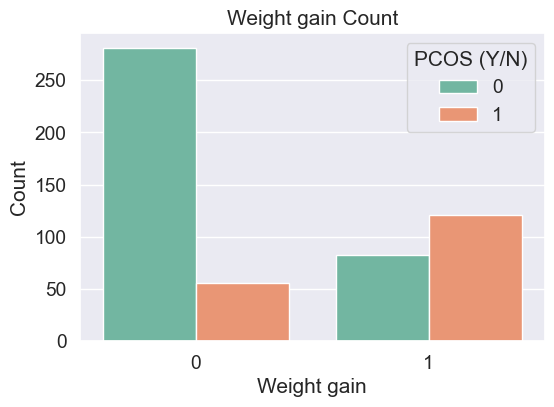

In [31]:
data['Weight gain(Y/N)'].unique()
plt.figure(figsize=(6,4))
sns.countplot(x="Weight gain(Y/N)",data=data, hue='PCOS (Y/N)', palette="Set2")
plt.title("Weight gain Count")
plt.xlabel("Weight gain")
plt.ylabel("Count")
plt.show()

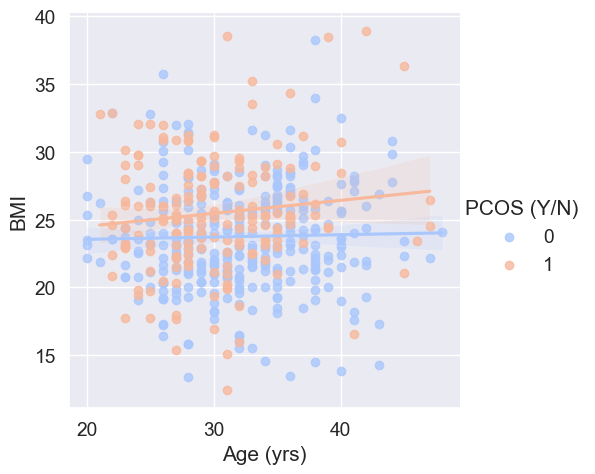

In [32]:
fig= sns.lmplot(data =data,x="Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= "coolwarm")
plt.show(fig)

#older women with higher BMI are more likely to have PCOS



C:\Users\lando\AppData\Local\Temp\ipykernel_18524\3142199027.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["PCOS (Y/N)"], y='Follicle No. (L)', data=data, palette="coolwarm")


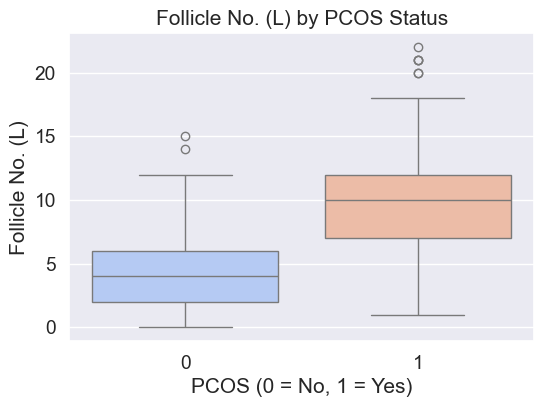

In [33]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data["PCOS (Y/N)"], y='Follicle No. (L)', data=data, palette="coolwarm")
plt.title("Follicle No. (L) by PCOS Status")
plt.xlabel("PCOS (0 = No, 1 = Yes)")
plt.ylabel("Follicle No. (L)")
plt.show()
#PCOS patients have more follicles in the left ovary


C:\Users\lando\AppData\Local\Temp\ipykernel_18524\432280305.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["PCOS (Y/N)"], y='Follicle No. (R)', data=data, palette="coolwarm")


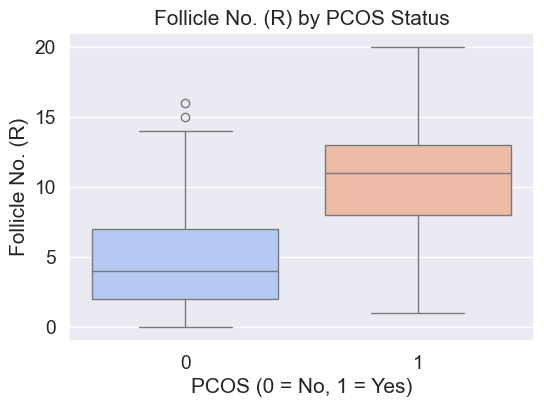

In [34]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data["PCOS (Y/N)"], y='Follicle No. (R)', data=data, palette="coolwarm")
plt.title("Follicle No. (R) by PCOS Status")
plt.xlabel("PCOS (0 = No, 1 = Yes)")
plt.ylabel("Follicle No. (R)")
plt.show()
#PCOS patients have more follicles in the right ovary

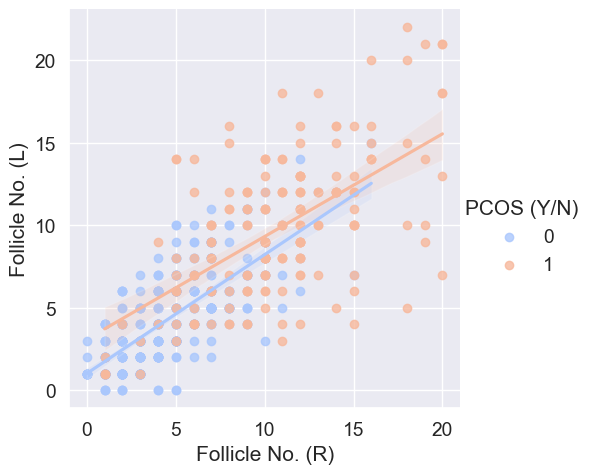

In [35]:
sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette="coolwarm")
plt.show()
#PCOS patients have more follicles in both ovaries


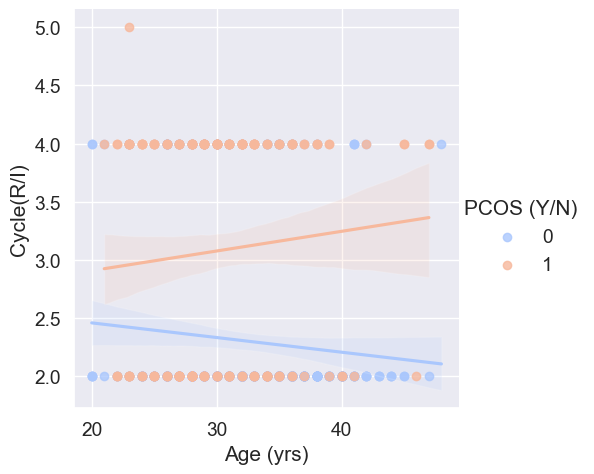

In [36]:
sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)",palette="coolwarm")
plt.show()
#PCOS patients have irregular cycles



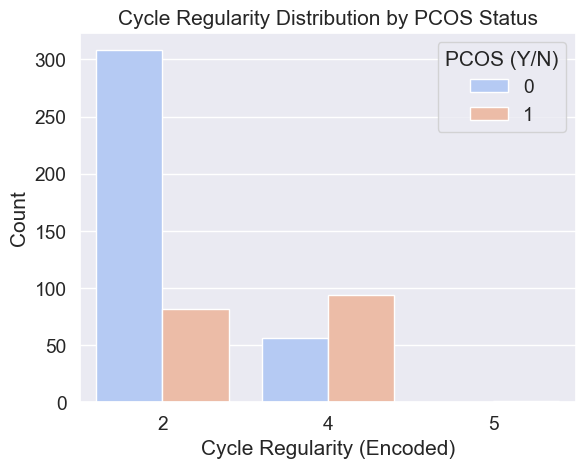

In [37]:
sns.countplot(data=data, x="Cycle(R/I)", hue="PCOS (Y/N)", palette="coolwarm")
plt.title("Cycle Regularity Distribution by PCOS Status")
plt.xlabel("Cycle Regularity (Encoded)")
plt.ylabel("Count")
plt.show()


In [38]:
data['Skin darkening (Y/N)'].unique()
data['Weight gain(Y/N)'].unique()
data['hair growth(Y/N)'].unique()


array([0, 1])

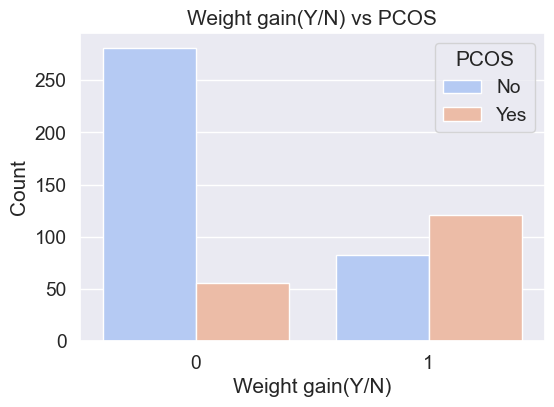

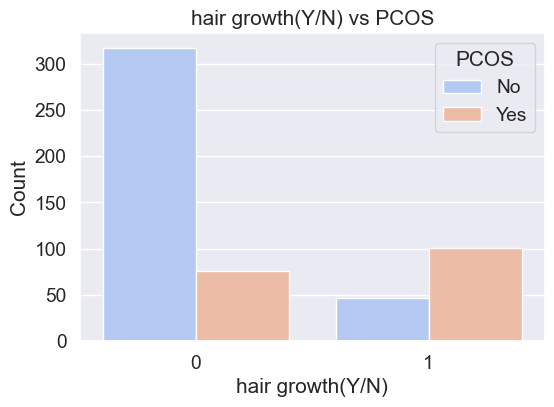

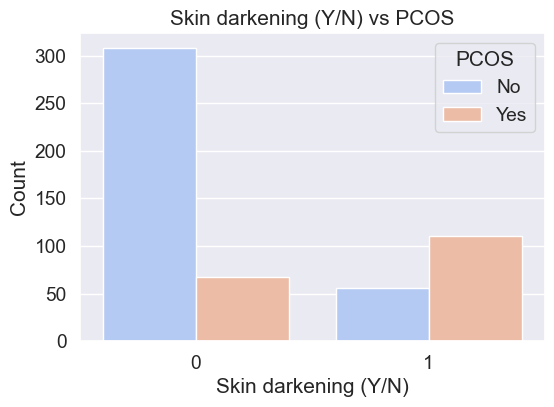

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=feature, hue="PCOS (Y/N)", palette="coolwarm")
    plt.title(f"{feature} vs PCOS")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="PCOS", labels=["No", "Yes"])
    plt.show()
#PCOS patients are more likely to have weight gain, hair growth and skin darkening

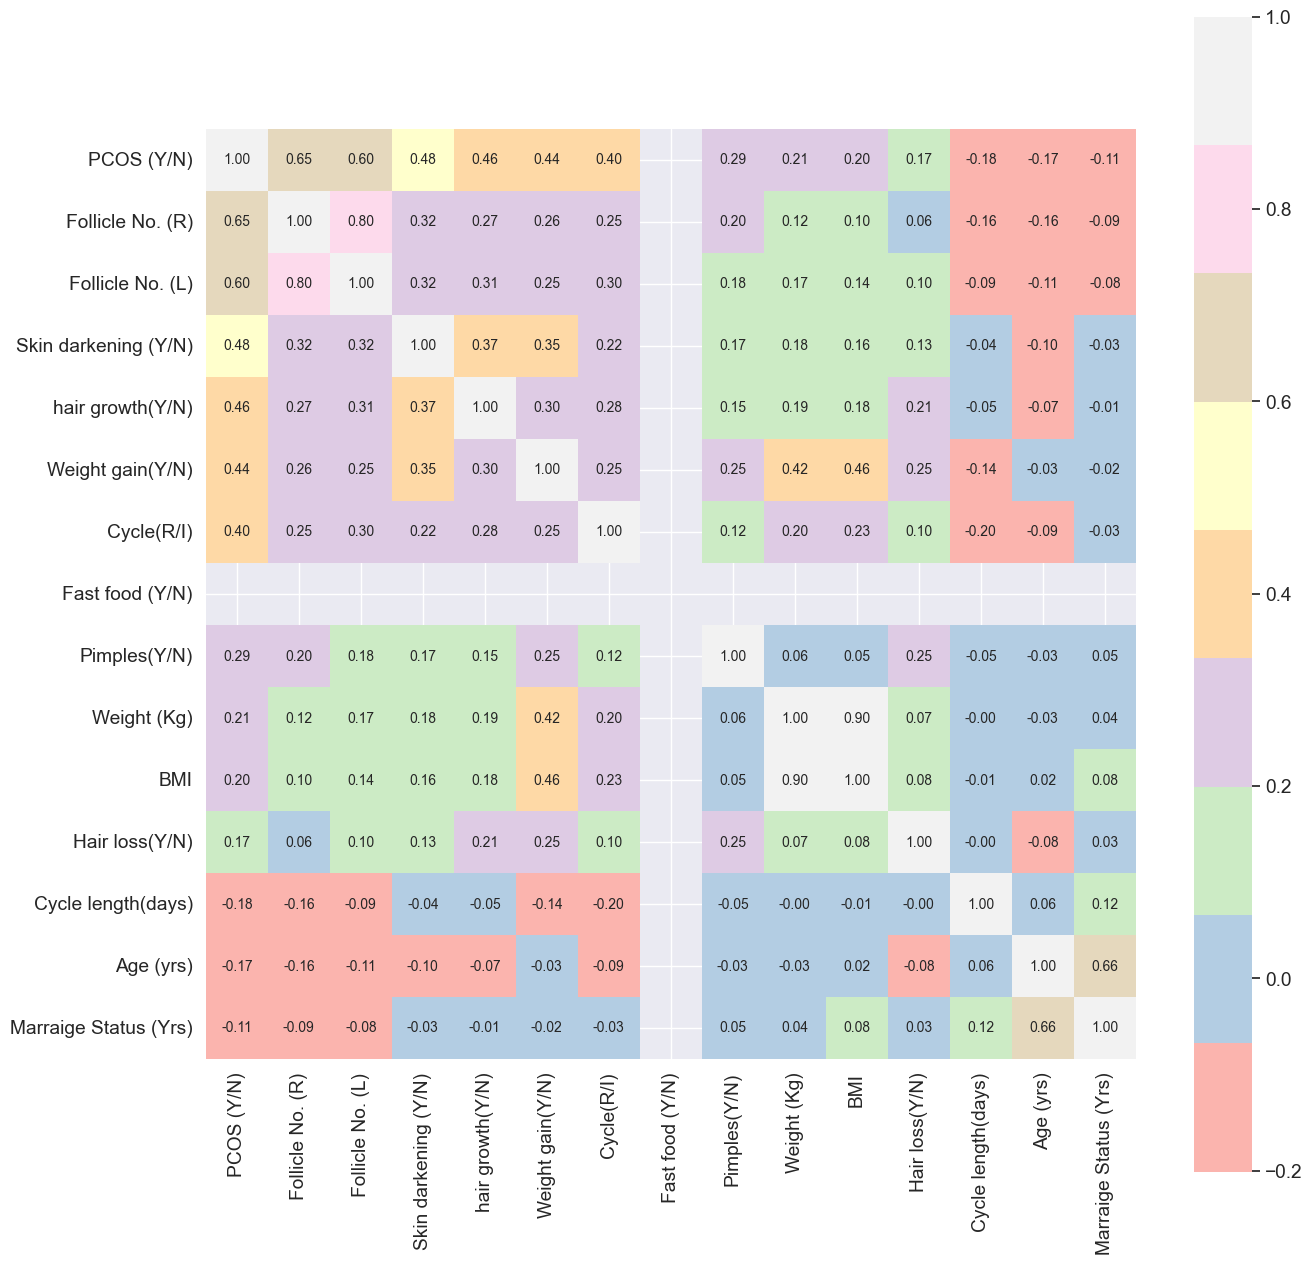

In [40]:
import numpy as np
plt.figure(figsize=(15,15))
k = 12 
l = 3 
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [41]:
#How the features correlate with PCOS (Y/N)
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = data.corr()
corrmat["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.377933
Pimples(Y/N)              0.286077
Weight (Kg)               0.211938
BMI                       0.199534
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
AMH(ng/mL)                0.065741
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)          0.036928
Blood Group               0.036433
II    beta-HCG(mIU/m

### Features selection

In [42]:
corr_with_pcos = corrmat["PCOS (Y/N)"].abs().sort_values(ascending=False)
top_features = corr_with_pcos[corr_with_pcos > 0.16].index.tolist()
top_features.remove("PCOS (Y/N)")  


In [43]:
remove_cols = ['Weight (Kg)']
top_features = [col for col in top_features if col not in remove_cols]


In [44]:
x_selected = data[top_features]
x_selected

,Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Fast food (Y/N),Pimples(Y/N),BMI,Cycle length(days),Hair loss(Y/N),Age (yrs),Waist(inch),Hip(inch)
0,3,3,0,0,0,2,1.0,0,19.300000,5,0,28,30,36
1,5,3,0,0,0,2,0.0,0,24.921163,5,0,36,32,38
2,15,13,0,0,0,2,1.0,1,25.270891,5,1,33,36,40
3,2,2,0,0,0,2,0.0,0,29.674945,5,0,37,36,42
4,4,3,0,0,0,2,0.0,0,20.060954,5,1,25,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,1,0,0,0,2,0.0,0,18.500000,5,0,35,26,28
537,7,9,0,0,1,2,0.0,0,25.300000,5,0,30,32,34
538,0,1,0,0,0,2,0.0,0,23.400000,6,0,36,28,30
539,6,7,0,0,0,4,0.0,1,22.200000,2,0,27,26,28


C:\Users\lando\AppData\Local\Temp\ipykernel_18524\2024740000.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_pcos[top_features].index, y=corr_with_pcos[top_features].values, palette="coolwarm")


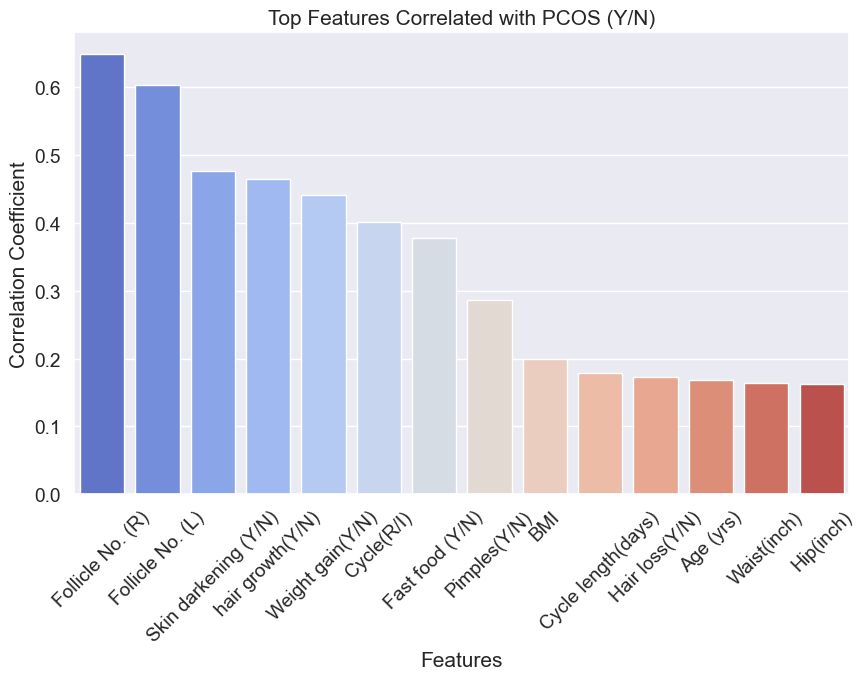

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_pcos[top_features].index, y=corr_with_pcos[top_features].values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top Features Correlated with PCOS (Y/N)")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()

In [46]:

y=data['PCOS (Y/N)']
x_selected=np.nan_to_num(x_selected)

### handling unbalanced data
#### oversampling

In [47]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_selected, y)

In [48]:
y_resampled.shape

(728,)

In [49]:
x_resampled.shape

(728, 14)

#### scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [51]:
#normalize the oversampled data
x_res_scaled = scaler.fit_transform(x_resampled)


In [52]:
print("Scaled features (x):", x_res_scaled)


Scaled features (x): [[0.15       0.13636364 0.         ... 0.28571429 0.26086957 0.45454545]
 [0.25       0.13636364 0.         ... 0.57142857 0.34782609 0.54545455]
 [0.75       0.59090909 0.         ... 0.46428571 0.52173913 0.63636364]
 ...
 [0.4        0.31183657 0.         ... 0.43355698 0.4903996  0.59090909]
 [0.54994973 0.31813612 1.         ... 0.78575019 0.29342362 0.31813612]
 [0.75776695 0.45454545 1.         ... 0.39285714 0.34444915 0.36716679]]


### PCA : principal components analysis

In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
x_pca = pca.fit_transform(x_res_scaled)
print("before PCA features shape:", x_res_scaled.shape)
print("PCA transformed features shape:", x_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)

before PCA features shape: (728, 14)
PCA transformed features shape: (728, 9)
Explained variance ratio: [0.36016331 0.13255482 0.10801709 0.09101411 0.08029389 0.07523687
 0.04783847 0.03511878 0.02802886]


In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y_resampled, test_size=0.2, random_state=10)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, mean_absolute_error, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, mean_absolute_error, f1_score
from sklearn.model_selection import cross_val_score

### KNN

In [56]:
#train the model on PCA transformed data
knn2 = KNeighborsClassifier(n_neighbors=20)
# Train the model
knn2.fit(x_train, y_train.ravel())  # Use .ravel() to flatten y_train if it's a 2D array
print(f'KNN \ncross validation score :{cross_val_score(knn2,x_train,y_train.ravel(),cv=5).mean()}')
# Make predictions on the test set
y_pred2 = knn2.predict(x_test)
# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy on PCA data:", accuracy2)
mse2, r2_2, mae2, f1score2 = mean_squared_error(y_pred2, y_test), r2_score( y_pred2,y_test), mean_absolute_error( y_pred2,y_test),f1_score(y_pred2, y_test)
print(f':MSE: {mse2}\nR2: {r2_2}\nMAE: {mae2}\nF1_score: {f1score2}')


KNN 
cross validation score :0.8574712643678162
Accuracy on PCA data: 0.8493150684931506
:MSE: 0.1506849315068493
R2: 0.3899335232668566
MAE: 0.1506849315068493
F1_score: 0.8641975308641975


C:\Users\lando\AppData\Local\Temp\ipykernel_18524\2465419314.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  knn2.fit(x_train, y_train.ravel())  # Use .ravel() to flatten y_train if it's a 2D array
C:\Users\lando\AppData\Local\Temp\ipykernel_18524\2465419314.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  print(f'KNN \ncross validation score :{cross_val_score(knn2,x_train,y_train.ravel(),cv=5).mean()}')


trying with oversampled data

## SVM

In [57]:
# training with the pca transformed data
from sklearn.svm import SVC
svm2 = SVC(kernel='linear', gamma=1,C=1)
svm2.fit(x_train, y_train.ravel())
print(f'SVM\ncross validation score :{cross_val_score(svm2,x_train,y_train.ravel(),cv=5).mean()}')
y_pred2 = svm2.predict(x_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy on PCA data:", accuracy2)
mse2, r2_2, mae2, f1score2 = mean_squared_error(y_pred2, y_test), r2_score( y_pred2,y_test), mean_absolute_error( y_pred2,y_test), f1_score(y_pred2, y_test)
print(f'MSE: {mse2}\nR2: {r2_2}\nMAE: {mae2}\nF1_score: {f1score2}')



SVM
cross validation score :0.9072796934865901
Accuracy on PCA data: 0.9246575342465754
MSE: 0.07534246575342465
R2: 0.6958333333333333
MAE: 0.07534246575342465
F1_score: 0.9316770186335404


C:\Users\lando\AppData\Local\Temp\ipykernel_18524\3163286761.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  svm2.fit(x_train, y_train.ravel())
C:\Users\lando\AppData\Local\Temp\ipykernel_18524\3163286761.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  print(f'SVM\ncross validation score :{cross_val_score(svm2,x_train,y_train.ravel(),cv=5).mean()}')


## logistic regression

In [58]:
#training with the pca transformed data
from sklearn.linear_model import LogisticRegression
lg2 = LogisticRegression(max_iter=1000, random_state=0)
print(f'Logistic Regression\ncross validation score :{cross_val_score(lg2,x_train,y_train.ravel(),cv=5).mean()}')
lg2.fit(x_train, y_train.ravel())
y_pred2 = lg2.predict(x_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy on PCA data:", accuracy2)
mse2, r2_2, mae2, f1score2 = mean_squared_error(y_pred2, y_test), r2_score( y_pred2,y_test), mean_absolute_error( y_pred2,y_test), f1_score(y_pred2, y_test)
print(f'MSE: {mse2}\nR2: {r2_2}\nMAE: {mae2}\nF1_score: {f1score2}')


Logistic Regression
cross validation score :0.8986737400530505
Accuracy on PCA data: 0.9315068493150684
MSE: 0.0684931506849315
R2: 0.7241639901757038
MAE: 0.0684931506849315
F1_score: 0.9375


C:\Users\lando\AppData\Local\Temp\ipykernel_18524\2835426774.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  print(f'Logistic Regression\ncross validation score :{cross_val_score(lg2,x_train,y_train.ravel(),cv=5).mean()}')
C:\Users\lando\AppData\Local\Temp\ipykernel_18524\2835426774.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  lg2.fit(x_train, y_train.ravel())


#### Random forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5,10,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf2 = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf2, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(x_train, y_train) 
print("Best parameters found: ", grid_search.best_params_)
best_rf2 = grid_search.best_estimator_

y_pred2 = best_rf2.predict(x_test)
accuracy2 = accuracy_score(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)
mae2 = mean_absolute_error(y_test, y_pred2)
f1score2 = f1_score(y_test, y_pred2)

print(f'Random forest\ncross validation score :{cross_val_score(best_rf2, x_train, y_train, cv=5).mean()}')
print("Accuracy on PCA data:", accuracy2)
print(f'MSE: {mse2}\nR2: {r2_2}\nMAE: {mae2}\nF1_score: {f1score2}')

Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random forest
cross validation score :0.8952844090775127
Accuracy on PCA data: 0.9315068493150684
MSE: 0.0684931506849315
R2: 0.7226970560303894
MAE: 0.0684931506849315
F1_score: 0.9390243902439024


#### visualization of a single desicion tree from the trained random forest 


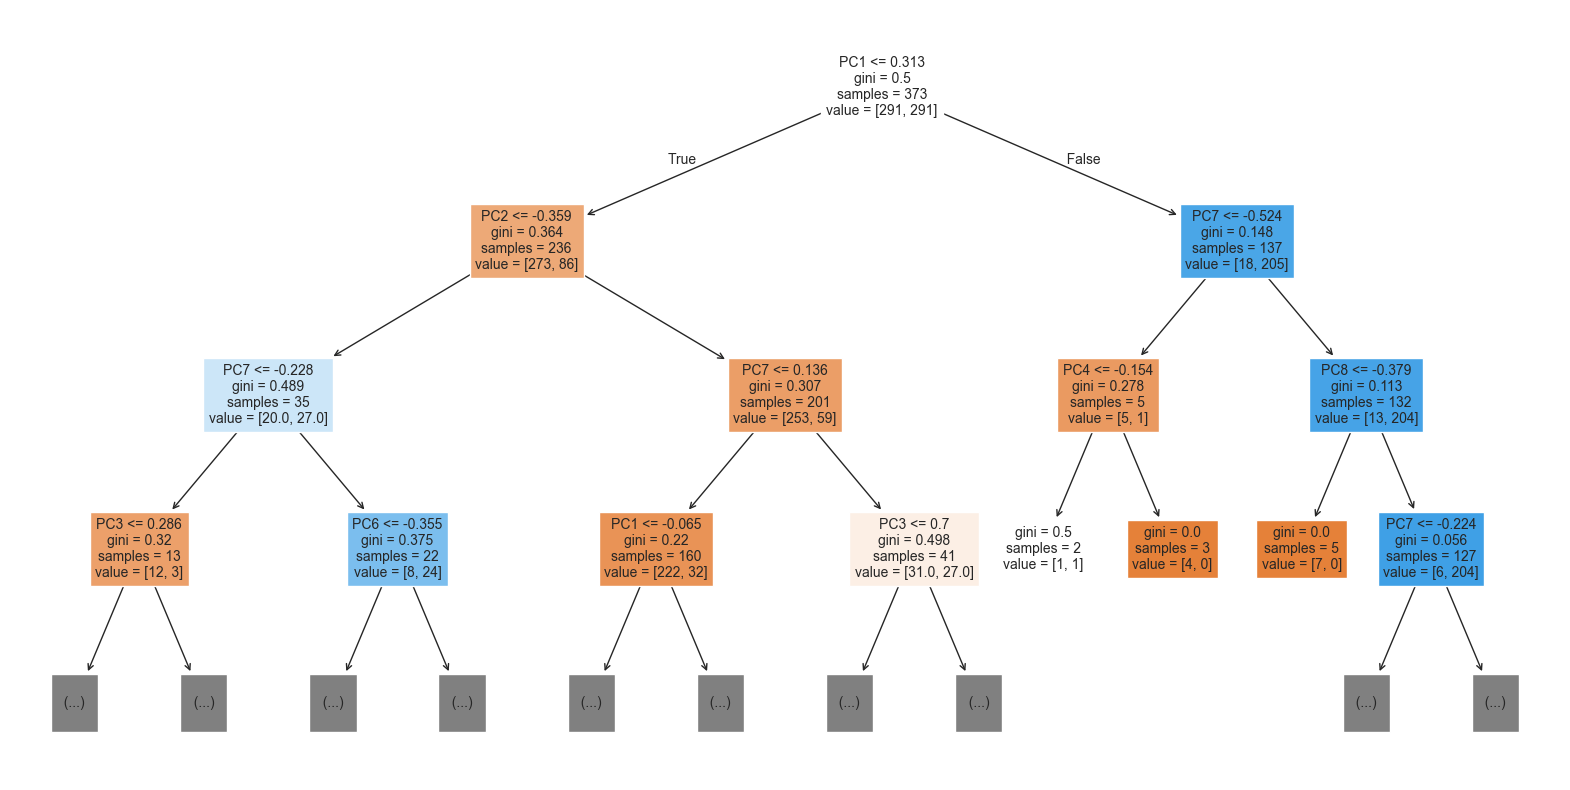

In [72]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_rf2.estimators_[0], 
          feature_names=[f'PC{i+1}' for i in range(x_train.shape[1])], 
          filled=True, 
          max_depth=3, # limit depth for readability
          fontsize=10)
plt.show()

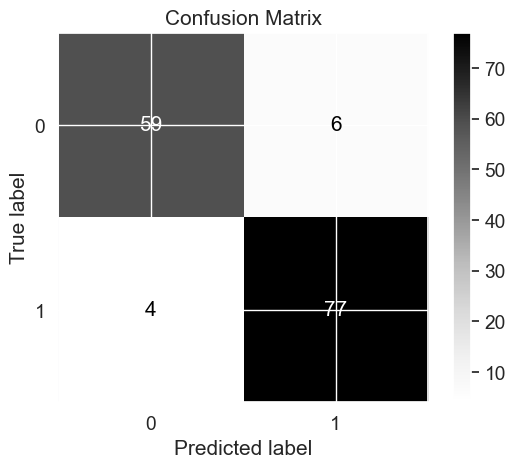

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf2.classes_)
disp.plot(cmap='Greys')
plt.title('Confusion Matrix')
plt.show()

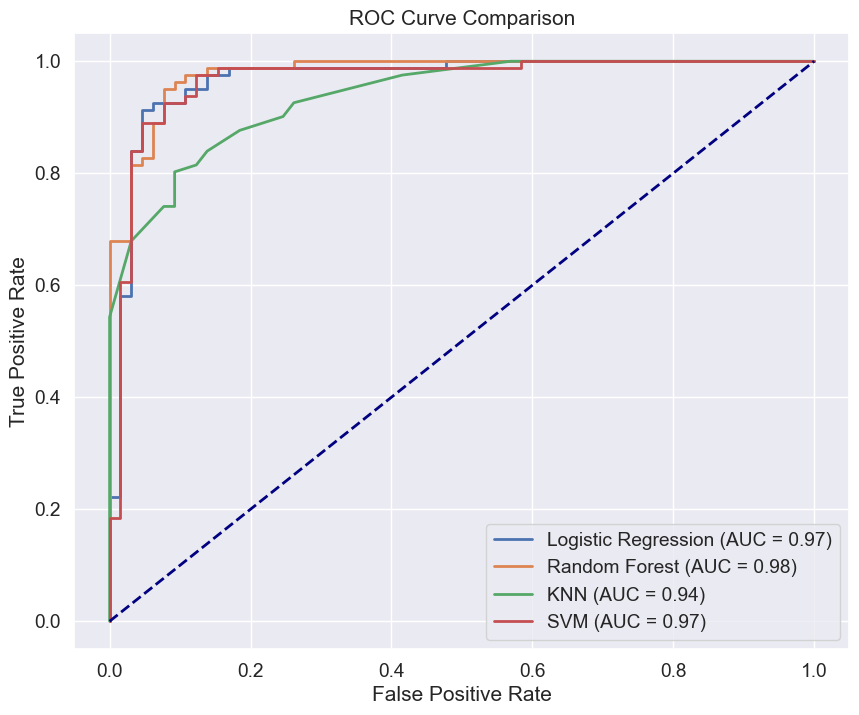

In [74]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize a dictionary to store ROC data for each model
roc_data = {}

# Logistic Regression
y_prob_lg = lg2.predict_proba(x_test)[:, 1]  
fpr_lg, tpr_lg, _ = roc_curve(y_test, y_prob_lg)
roc_auc_lg = auc(fpr_lg, tpr_lg)
roc_data['Logistic Regression'] = (fpr_lg, tpr_lg, roc_auc_lg)

# Random Forest
y_prob_rf = best_rf2.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_data['Random Forest'] = (fpr_rf, tpr_rf, roc_auc_rf)

# KNN
y_prob_knn = knn2.predict_proba(x_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_data['KNN'] = (fpr_knn, tpr_knn, roc_auc_knn)

# SVM (use decision_function instead of predict_proba)
y_score_svm = svm2.decision_function(x_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_data['SVM'] = (fpr_svm, tpr_svm, roc_auc_svm)

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for model, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, lw=2, label=f'{model} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random guessing)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

In [66]:
y_train_pred = lg2.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluate on test set
y_test_pred = lg2.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.3f}, Train F1: {train_f1:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}, Test F1: {test_f1:.3f}")

Train Accuracy: 0.907, Train F1: 0.904
Test Accuracy: 0.932, Test F1: 0.938


In [70]:
y_train_pred = best_rf2.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluate on test set
y_test_pred = best_rf2.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.3f}, Train F1: {train_f1:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}, Test F1: {test_f1:.3f}")

Train Accuracy: 0.993, Train F1: 0.993
Test Accuracy: 0.932, Test F1: 0.939


#### Test the models with a new data 

In [87]:

new_data = pd.DataFrame([{
    'Age (yrs)': 29,
    'Weight (Kg)': 62.0,
    'Height(Cm)': 160.0,
    'BMI': 24.2,
    'Blood Group': 11,  # Use the same encoding as in your training data
    'Pulse rate(bpm)': 78,
    'RR (breaths/min)': 18,
    'Hb(g/dl)': 12.5,
    'Cycle(R/I)': 2,
    'Cycle length(days)': 5,
    'Marraige Status (Yrs)': 2,
    'Pregnant(Y/N)': 0,
    'No. of aborptions': 0,
    'I beta-HCG(mIU/mL)': 2.0,
    'II    beta-HCG(mIU/mL)': 2.0,
    'FSH(mIU/mL)': 6.5,
    'LH(mIU/mL)': 4.5,
    'FSH/LH': 1.44,
    'Hip(inch)': 38,
    'Waist(inch)': 32,
    'Waist:Hip Ratio': 0.84,
    'TSH (mIU/L)': 2.5,
    'AMH(ng/mL)': 3.2,
    'PRL(ng/mL)': 18.0,
    'Vit D3 (ng/mL)': 25.0,
    'PRG(ng/mL)': 0.5,
    'RBS(mg/dl)': 90.0,
    'Weight gain(Y/N)': 0,
    'hair growth(Y/N)': 0,
    'Skin darkening (Y/N)': 0,
    'Hair loss(Y/N)': 1,
    'Pimples(Y/N)': 0,
    'Fast food (Y/N)': 1,
    'Reg.Exercise(Y/N)': 0,
    'BP _Systolic (mmHg)': 120,
    'BP _Diastolic (mmHg)': 80,
    'Follicle No. (L)': 6,
    'Follicle No. (R)': 8,
    'Avg. F size (L) (mm)': 16.0,
    'Avg. F size (R) (mm)': 15.0,
    'Endometrium (mm)': 8.0
}])
# New sample 1
new_data_1 = pd.DataFrame([{
    'Age (yrs)': 24,
    'Weight (Kg)': 54.0,
    'Height(Cm)': 155.0,
    'BMI': 22.5,
    'Blood Group': 13,
    'Pulse rate(bpm)': 82,
    'RR (breaths/min)': 17,
    'Hb(g/dl)': 11.8,
    'Cycle(R/I)': 1,
    'Cycle length(days)': 6,
    'Marraige Status (Yrs)': 0,
    'Pregnant(Y/N)': 0,
    'No. of aborptions': 0,
    'I beta-HCG(mIU/mL)': 1.8,
    'II    beta-HCG(mIU/mL)': 1.8,
    'FSH(mIU/mL)': 7.2,
    'LH(mIU/mL)': 5.1,
    'FSH/LH': 1.41,
    'Hip(inch)': 36,
    'Waist(inch)': 29,
    'Waist:Hip Ratio': 0.81,
    'TSH (mIU/L)': 2.1,
    'AMH(ng/mL)': 2.8,
    'PRL(ng/mL)': 16.0,
    'Vit D3 (ng/mL)': 22.0,
    'PRG(ng/mL)': 0.7,
    'RBS(mg/dl)': 88.0,
    'Weight gain(Y/N)': 0,
    'hair growth(Y/N)': 0,
    'Skin darkening (Y/N)': 0,
    'Hair loss(Y/N)': 0,
    'Pimples(Y/N)': 1,
    'Fast food (Y/N)': 1,
    'Reg.Exercise(Y/N)': 1,
    'BP _Systolic (mmHg)': 110,
    'BP _Diastolic (mmHg)': 70,
    'Follicle No. (L)': 4,
    'Follicle No. (R)': 5,
    'Avg. F size (L) (mm)': 15.0,
    'Avg. F size (R) (mm)': 14.0,
    'Endometrium (mm)': 7.5
}])

# New sample 2
new_data_2 = pd.DataFrame([{
    'Age (yrs)': 35,
    'Weight (Kg)': 78.0,
    'Height(Cm)': 168.0,
    'BMI': 27.6,
    'Blood Group': 15,
    'Pulse rate(bpm)': 76,
    'RR (breaths/min)': 19,
    'Hb(g/dl)': 13.2,
    'Cycle(R/I)': 2,
    'Cycle length(days)': 4,
    'Marraige Status (Yrs)': 10,
    'Pregnant(Y/N)': 1,
    'No. of aborptions': 1,
    'I beta-HCG(mIU/mL)': 3.2,
    'II    beta-HCG(mIU/mL)': 3.2,
    'FSH(mIU/mL)': 8.1,
    'LH(mIU/mL)': 7.3,
    'FSH/LH': 1.11,
    'Hip(inch)': 44,
    'Waist(inch)': 38,
    'Waist:Hip Ratio': 0.86,
    'TSH (mIU/L)': 3.0,
    'AMH(ng/mL)': 4.5,
    'PRL(ng/mL)': 21.0,
    'Vit D3 (ng/mL)': 18.0,
    'PRG(ng/mL)': 0.3,
    'RBS(mg/dl)': 110.0,
    'Weight gain(Y/N)': 1,
    'hair growth(Y/N)': 1,
    'Skin darkening (Y/N)': 1,
    'Hair loss(Y/N)': 1,
    'Pimples(Y/N)': 1,
    'Fast food (Y/N)': 0,
    'Reg.Exercise(Y/N)': 0,
    'BP _Systolic (mmHg)': 130,
    'BP _Diastolic (mmHg)': 85,
    'Follicle No. (L)': 10,
    'Follicle No. (R)': 12,
    'Avg. F size (L) (mm)': 18.0,
    'Avg. F size (R) (mm)': 17.0,
    'Endometrium (mm)': 9.0
}])

print(new_data_1)
print(new_data_2)
print(new_data)

   Age (yrs)  Weight (Kg)  ...  Avg. F size (R) (mm)  Endometrium (mm)
0         24         54.0  ...                  14.0               7.5

[1 rows x 41 columns]
   Age (yrs)  Weight (Kg)  ...  Avg. F size (R) (mm)  Endometrium (mm)
0         35         78.0  ...                  17.0               9.0

[1 rows x 41 columns]
   Age (yrs)  Weight (Kg)  ...  Avg. F size (R) (mm)  Endometrium (mm)
0         29         62.0  ...                  15.0               8.0

[1 rows x 41 columns]


In [ ]:
samples = [new_data, new_data_1, new_data_2]
sample_names = ["Sample 0", "Sample 1", "Sample 2"]

for i, sample in enumerate(samples):
    print(f"\n--- {sample_names[i]} ---")

    sample_selected = sample[top_features]
    
    sample_selected = np.nan_to_num(sample_selected)
   
    sample_scaled = scaler.transform(sample_selected)
    
    sample_pca = pca.transform(sample_scaled)

    
    print("Random Forest:", best_rf2.predict(sample_pca)[0], "Prob:", best_rf2.predict_proba(sample_pca)[0])
    print("Logistic Regression:", lg2.predict(sample_pca)[0], "Prob:", lg2.predict_proba(sample_pca)[0])
    print("KNN:", knn2.predict(sample_pca)[0], "Prob:", knn2.predict_proba(sample_pca)[0])
    print("SVM:", svm2.predict(sample_pca)[0])


--- Sample 0 ---
Random Forest: 0 Prob: [0.8095 0.1905]
Logistic Regression: 0 Prob: [0.87359655 0.12640345]
KNN: 0 Prob: [0.8 0.2]
SVM: 0

--- Sample 1 ---
Random Forest: 0 Prob: [0.80111905 0.19888095]
Logistic Regression: 0 Prob: [0.92126907 0.07873093]
KNN: 0 Prob: [0.85 0.15]
SVM: 0

--- Sample 2 ---
Random Forest: 1 Prob: [0.18089286 0.81910714]
Logistic Regression: 1 Prob: [0.05054641 0.94945359]
KNN: 1 Prob: [0.1 0.9]
SVM: 1


#### Save the best model

In [91]:
import joblib
joblib.dump(best_rf2, './models/random_forest_model.pkl')
joblib.dump(scaler, './models/scaler.pkl')
joblib.dump(pca, './models/pca_model.pkl')
joblib.dump(top_features, 'models/top_features.pkl')


['models/top_features.pkl']